In [13]:
# 파이썬 동적 웹 크롤링 라이브러리
from selenium.webdriver.common.by import By
from selenium import webdriver
# 알림창 등을 회피하기 위한 키보드 라이브러리
import pyautogui

# 각종 라이브러리
import pandas as pd
import time
import re

# 유적지 데이터셋 읽기 및 유적지명 리스트 생성
df = pd.read_csv('KC_507_LLR_HISTST_2022_test.csv')
dest_lst = df['prompt'].values.tolist()

results = {}

# 크롤링 시작
driver = webdriver.Chrome()
driver.get('https://www.instagram.com')
time.sleep(3)

# id, pw 입력 및 로그인
ID = 'id'
pw = 'pw'

# ID 문자열 전송
input_id = driver.find_elements(By.CSS_SELECTOR, 'input')[0]
input_id.clear()
input_id.send_keys(ID)

time.sleep(0.5)

# PW 문자열 전송
input_pw = driver.find_elements(By.CSS_SELECTOR, 'input')[1]
input_pw.clear()
input_pw.send_keys(pw)

# 로그인
time.sleep(2)
input_pw.submit()
time.sleep(10)

# 팝업창 닫기
pyautogui.press('tab')
time.sleep(1)
pyautogui.press('enter')
time.sleep(3)
pyautogui.press('esc')
time.sleep(1)

# 검색창 열기
driver.find_elements(By.CSS_SELECTOR,'[aria-label="검색"]')[0].click()
time.sleep(1)
input_sch = driver.find_elements(By.CSS_SELECTOR, 'input')[0]

#7627개 유적지 순회
for i in range(len(dest_lst)):
    
    # 500개 검색 후 세션 해제 방지를 위한 페이지 새로고침
    if i%500 == 0 and i!=0:
        driver.refresh()
        time.sleep(10)
        driver.find_elements(By.CSS_SELECTOR,'[aria-label="검색"]')[0].click()
        time.sleep(1)
        input_sch = driver.find_elements(By.CSS_SELECTOR, 'input')[0]
    
    # 유적지명 검색
    word = dest_lst[i]
    input_sch.clear()
    input_sch.send_keys(word)
    time.sleep(1)
    
    # 결과 HTML 별도 TXT 파일로 저장
    html = driver.page_source
    with open('./html_save/'+str(word)+'.txt','w',encoding = 'utf16') as f:
        temp = str(html)
        # 용량을 줄이기 위해 불필요한 부분 제거 후 저장
        temp = temp[temp.find('프로필 사진'):temp.find('회원님을 위한 추천')]
        f.write(temp)

    print(word, ' Complete')
    time.sleep(1)


장유화상사리탑  Complete
공덕동삼층석탑  Complete
성주읍 충혼탑  Complete
광양기독교선교100주년기념탑  Complete
천안함46용사위령탑  Complete
존치교각  Complete
효사각  Complete
남양홍씨절부비  Complete
전주유씨열녀정문  Complete
은진송씨정려각  Complete
하빈면 삼충각  Complete
풍영정  Complete
징효대사보인탑비  Complete
금곡사삼층석탑  Complete
제천시민탑  Complete
지평리선정비림  Complete
삼효각  Complete
상주천주교신앙고백비  Complete
청연루  Complete
2.28민주의거기념탑  Complete
금산면 천왕문  Complete
사곡면 천왕문  Complete
효부각  Complete
이철견신도비  Complete
고한읍 정암사수마노탑  Complete
산동면 방호정  Complete
보국암  Complete
하연암  Complete
개천면 청련암  Complete
현화암  Complete
고척동 보연암  Complete
성북동 수월암  Complete
신림동 수정암  Complete
연산동 옥수암  Complete
봉곡암  Complete
음암  Complete
입암면 입암  Complete
양강면 쌍암  Complete
엄다면 송암  Complete
동명면 금암  Complete
해관암  Complete
청룡동 사자암  Complete
변동 대원암  Complete
산서면 미륵암  Complete
금산사종무소  Complete
기도도량청룡암  Complete
명륜동 옥연암  Complete
진원암  Complete
청룡동 금강암  Complete
무룡동 성불암  Complete
동춘동 청량암  Complete
사곡면 청련암  Complete
도안면 약수암  Complete
금산사만월당  Complete
법주사삼성각  Complete
해인사명부전  Complete
해인사선열당  Complete
송광사화진당  Complet

'\n# 알림 설정 팝업창 제거 ("나중에 하기 버튼 클릭")\nbtn_later2 = driver.find_element(By.CLASS_NAME, \'_a9--._a9_1\')\nbtn_later2.click()\n\n# 조회\nfor i in range(len(dest_lst)):\n    word = dest_lst[i]\n    url = insta_searching(word)\n    \n    try:\n        # 검색 결과 페이지 열기\n        driver.get(url)\n        time.sleep(10)\n        num = driver.find_element(By.CLASS_NAME, \'_aaa6._aaa8\').text\n        results[i] = [word, num.split(\'\n\')[2]] # 태그 수만 추출\n        \n    except:\n        results[i] = [word, 0]\n        \n'

In [16]:
# 분석용 라이브러리 
import pandas as pd
# 파일시스템 제어용 라이브러리
import os

# html 저장 위치 접근 및 DataFrame 준비
path_dir = './html_save/'
file_list = os.listdir(path_dir)
df = pd.DataFrame({'SITE':[], 'TAGS':[]})

# txt 파일로 저장해둔 html 순회
for index, name in enumerate(file_list):
    
    # 파일 데이터 문자열로 읽어오기
    f=open('./html_save/'+name,"rt",encoding = 'utf16')
    tmp = ''
    while True:
        line = f.readline()
        tmp = tmp+line
        if line == '' :
            break
    f.close()

    # 문자열에서 게시물 개수를 탐색
    h_site = name.replace('.txt','')
    count = 0
    start = tmp.find('>#'+h_site+'<')
    if start>=0:
        pnt1 = tmp[start:].find('게시물')
        pnt2 = tmp[start+pnt1:].find('<span>')
        end = tmp[start+pnt1+pnt2:].find('</span>')
        hashtags = tmp[pnt1+pnt2+start:pnt1+pnt2+start+end].replace('<span>','')
        
        # 태그 수 만개 이상, 한글표시 숫자로 변경
        ten_thou = hashtags.find('만')
        if ten_thou < 0:
            count = int(hashtags)
        else:
            count = int(float(hashtags.replace('만',''))*10000)
        
    # DataFrame에 유적지명 | 해시태그 수 로 저장
    print(h_site, count)
    df.loc[index, 'SITE'] = h_site
    df.loc[index, 'TAGS'] = count
    
display(df)

df.to_csv('Insta_Analyze.csv', index=False, encoding='utf16')

104고지전적비 0
10월항쟁위령탑 0
1100고지 0
1100고지습지 3145
12지상부도 0
13도창의군탑 18
2.28민주의거기념탑 0
3.15의거탑 0
3.1독립운동기념비 0
3.1만세운동유적비 0
3.1봉화대 0
3.1운동계단 0
3.1운동기념탑 0
3.1운동순국유적 0
3.1운동유적지 0
3.1의거탑 0
3.1항쟁기념탑 0
3겹까치구멍집 2
3층석탑 1058
3층지진탑 0
4.19탑 0
4세효자각 0
5.18항쟁사적지 0
5층석탑 973
6.25남침사적탑 0
6.25민안비 0
6.25참전호국기념비 0
UN군초전비 0
UN군화장터 0
UN전적비 0
가곡리고가 0
가곡리고분 0
가곡리오층석탑 8
가곡면 월명암 0
가곡유황족욕체험장 54
가남읍 한밭 0
가덕도대항인공동굴 190
가덕도동백군생지 0
가덕도척화비 10
가락굴 0
가래봉 11
가릉 521
가리왕산어름동굴 0
가마기산성 0
가마봉 2158
가마오름 360
가마인물토기 0
가메오름 188
가메옥 78
가메창 17
가문이오름 67
가배량성 34
가사문학면 소쇄원 0
가산바위 1427
가산산성 6736
가산산성진남문 73
가산석장승 0
가새바위 21
가선대부김악소불망비 0
가세오름 149
가스사고자위령탑 0
가시오름 140
가야면 일주문 0
가야면 지족암 0
가야면 해탈문 0
가야진사 2030
가양봉 7
가오작리고인돌 0
가을포봉수대 1
가음정동고분군 2
가인김병로생가터 0
가정목은선생문집판 0
가제굴 15
가조도옥녀봉 119
가좌동 대원암 0
가지산쌀바위 62
가천면 만귀정 0
가천정 2
가칠봉 206
가침박달나무군락 3
가탑리사지 0
가평읍 3.1운동기념비 0
가평읍 현충탑 0
가평전투전적비 0
가학동지석묘 8
가학루 83
가회면 쌍사자석등 0
가흥리마애삼존불상 0
각리언곡재 0
각산봉화대 302
각산산성 100
각시굴 2
각시바위 295
각화사귀부 0
각황전 1263
각황전앞석등 146
간성읍 충혼탑 0
간월사지 0
간재고택 0
간파리느티나무 0
간파리봉수지 0
간파리은행나무 0
간파리적석유구 

금호루 0
금호읍 만취당 0
금호재 2
긍구당 223
긍구당고택 0
긍구정 1
기계유씨열녀문 0
기곡재사 1
기기암 137
기념탑 890
기도도량청룡암 0
기마인물형토기 226
기산동도요지 0
기산향토마을 0
기성관 150
기성동삼층석탑 9
기세철제불망비 0
기솔리석불입상 12
기암 910
기영각 16
기옹영정 0
기장남산봉수대 5
기장읍 옥련암 0
기장이길봉수대 0
기장죽성리왜성 7
기장죽성리해송 24
기장척화비 9
기천고택 0
기천서원지 2
긴잎느티나무 55
길동 천수암 0
길상면 대웅전 0
길상사 42000
길상탑 0
길수익효자비 0
길승암 0
길안면 금정암 0
김갑동가옥 1
김개남장군묘 0
김개인생가지 1
김계휘신도비 0
김관식시비 0
김광서효자문 0
김광악정려 0
김규진가옥 24
김근수가옥 2
김기량순교현양비 29
김기응가옥 4
김낙선의사기적비 0
김낙윤가옥 0
김남주생가 25
김녕사굴 238
김대자가옥 0
김대중대통령생가 135
김덕래가옥 5
김덕진가옥 0
김덕함묘 1
김도언어사각 0
김동명기념비 0
김두범효자각 0
김두징묘비 0
김두한가옥 8
김뢰진가옥 8
김면장군유적지 29
김명관고택 459
김문기유허비 0
김바위 189
김범우토마스묘 19
김병욱송덕비 0
김병호고가 0
김복한묘 0
김봉호가옥 431
김삿갓시비 0
김삿갓유적지 283
김삿갓종영지 3
김상만생가 0
김상용순절비 85
김석몽처남평문씨열녀문 0
김선기가옥 12
김성래가옥 3
김세균판서고가 0
김수로왕비능 0
김수온묘소 0
김수환추기경생가 430
김시민장군유허지 5
김시민장군전공비 7
김시민장군충민사 3
김시습부도 9
김시습영정 3
김시식유적보존회 0
김시식지 118
김씨남악종택 0
김씨눌곡종택 0
김씨서지재사 0
김씨운암종택 0
김씨율리종택 0
김씨정려문 0
김씨종택 1
김씨종회소 0
김씨지사공종택 0
김씨태장재사 0
김아가다묘성지 0
김안균가옥 10
김양묘 22
김여지선생묘 0
김영구가옥 6
김영삼생가 427
김영이와장비단소 2
김영재묘성지 0
김영주고택 0
김완장군유적지 3
김완장

두일리태실 0
두정산성 0
두타산성 1072
두평리5층석탑 0
두학동 약수암 0
두학동석조여래입상 1
둔덕기성 676
둔마리벽화고분 4
둔산선사유적지 314
둔주봉 0
둔지봉 210
둔토리성지 2
뒤굽은이 7
뒷들굴 0
들레오름 14
들리오름 0
등명사지5층석탑 0
등억온천단지 2048
따라비 851
딴수시암 0
땅끝마을탑비 37
땜비알굴 0
뚝향나무 63
라원리오층석탑 0
락서암 0
류관선생묘 0
류자신선생신도비 2
리기다송조림지 0
마곡사국사당 1
마곡사대광보전 33
마곡사대웅보전 41
마곡사대향각 0
마곡사매화당 0
마곡사범종각 0
마곡사수선사 0
마곡사심검당 0
마곡사염화당 0
마곡사영산전 15
마곡사오층석탑 43
마곡사요사 0
마곡사응진전 3
마곡사흥성루 0
마금산온천 2682
마늘봉 140
마도진만호성지 0
마동사지3층석탑 0
마두동 문수암 0
마량미항 303
마령동기와까치구멍집 0
마로산성 253
마보기 38
마산동산성 2
마산면 대웅전 0
마산면 석등 0
마서면 천지암 0
마암 627
마애보살입상 222
마애불 2582
마애불사존불상 0
마애불좌상 140
마애사면석불 0
마애삼존석불 6
마애석가여래좌상 146
마애석불 539
마애석불입상 6
마애여래상 19
마애여래좌상 803
마애지장보살좌상 7
마오름 99
마원성지 131
마은이 11
마전군관아터 0
마전향교터 0
마중오름 49
마천루 21000
마천면 마애여래입상 0
마천면 부도 0
마패봉 517
마포동 극락암 0
마포최사영고택 3
마하리백제고분군 0
만경노씨삼의사생가지 0
만곡정사 4
만남재 110
만년위패영 0
만대헌 0
만덕사 0
만덕사지 44
만동묘정비 3
만둔사지 0
만령초당 0
만묵당서실 0
만복사지 188
만봉리석조여래입상 0
만석보지 1
만성암 56
만세루 0
만세암 22
만세운동기념비 3
만세운동유적지 1
만수봉 378
만어사삼층석탑 38
만운동모선루 1
만육최양선생유허비 0
만인의총 791
만정김소희생가 1
만정사 0
만정헌 7
만주사 13
만파루 9
만해한용운생가 160
만

북암 19
북오름 171
북이면 삼일사 0
북일곶돈대 44
북일면 방대형고분 0
북정고분군 49
북지장사삼층석탑 1
북지장사석조지장보살좌상 1
북촌댁 461
북촌리선사주거지유적 1
북촌한옥마을 336000
북평면 도솔봉 0
북평면 이진성지 0
북포루 1351
북하면 천진암 0
북한동 문수봉 0
북한산성 8831
북후면 방단형적석탑 0
북후면 옥수암 0
분산성 7038
분오리돈대 1823
분옥정 128
분청사기도요지 1
분청사기요지 1
불갑면 대웅전 0
불곡석불좌상 9
불광동 성불암 0
불국사 408000
불국사경내 15
불굴사삼층석탑 2
불령암 3
불로동고분군 14000
불사암 27
불설부모은중경 30
불암사경판 2
불암산성 234
불은면 충장사 0
불일암 1780
불임암 36
불정원 2
붉가시나무자생지 0
브라운선교사사택 0
비각 402
비금면 성치산성 0
비노자나불좌상 0
비단봉 0
비두리귀부및이수 0
비둘기굴 0
비래동고인돌 14
비래바위 52
비래암 5
비로봉 61000
비로암 1011
비문전적비 0
비봉공룡알화석 0
비봉굴 0
비봉리패총 15
비봉면 남이장군묘 0
비봉면 홍련암 0
비봉산성 7
비봉암 11
비비정 4832
비선굴 0
비악효자비 0
비양봉 2650
비옥산성 0
비인오층석탑 15
비치미 41
비파산성 2
비하동 천지암 0
비홍산성 6
빈동재사 0
빈주암 0
빌레못동굴 51
빗접바위 1
빙산사지오층석탑 52
빙옥정 9
빙월당 123
빙허현진건문학비 0
사계정사 3
사곡리남근석 1
사곡면 감로암 0
사곡면 천왕문 0
사곡면 청련암 0
사곡면 해탈문 0
사괴당고택 9
사근산성 21
사근산성추모사당 0
사나사 2164
사남고택 26
사낭굴 0
사내리당산 1
사내면 촛대바위 0
사당동 성불암 0
사덕정 2
사도리3층석탑 0
사동 경찰충혼탑 0
사동 관덕정 0
사락정 2
사량면 최영장군사당 0
사려니 8463
사로당 0
사릉 6975
사리암 5995
사리탑 1280
사망암 2
사명대사기념관 61
사명대사부도 0
사명대사생가지 162
사명암 941
사

순담 2565
순릉 169
순직선원위령탑 5
순창객사 13
순창고추장마을 1468
순창원 89
순창읍 귀래정 0
순천만습지 146000
순천왜성 799
순천죽내리유적 0
순충공김선궁묘소 0
순흥어숙묘 1
순흥척화비 2
술역리지석묘 0
술정리동삼층석탑 0
술정리서삼층석탑 11
숫돌바위 0
숭굴 1
숭덕사 29
숭덕전 165
숭례문 40000
숭릉 0
숭복사지3층석탑 0
숭선군묘 1
숭선사지 6
숭신전 48
숭실재 2
숭열당 0
숭열전 5
숭원각 1
숭의동 백용암 0
숭의동 천지암 0
숭의전 1307
숭의전지 105
숭인원 298
숭정처사유허비 1
숭진리삼층석탑 6
숭현서원지 8
숭혜전 1474
숲정이 1671
숲정이성지 189
쉰동굴 1
스트로마톨라이트 292
승안사지삼층석탑 10
승언리상여 1
승일교 2992
승주읍 대웅전 0
승주읍 삼층석탑 0
승주정헌재 0
승주조순탁가옥 0
승주조승훈가옥 0
시가문화유적지 0
시루봉 23000
시립박물관오죽헌 0
시마타니금고 25
시무굴 0
시민탑 26
시사단 552
시오름 968
시인월하김달진생가 6
시천면 천주암 0
시천원리은행나무 0
시흥동 관음암 0
시흥동 성원암 0
식당암 585
식산봉 0
식영정 1754
식은이오름 7
식파정 69
신경리마애석불 1
신경섭가옥 724
신구동삼층석탑 0
신기동의느티나무 0
신기리고분군 7
신기리산성 0
신기리지석묘 2
신기면 너와집 0
신기짚신마을 0
신길원현감충렬비 2
신녕면 진불암 0
신녕향교대성전 0
신니면 미륵사지 0
신니면 송암 0
신당동석장승 2
신당산성 0
신대리3층석탑 0
신덕면 수운정 0
신도비 781
신돌석유적지 8
신돌석장군생가 89
신동엽생가 215
신동엽시비 7
신동읍 고성산성 0
신두리해안사구 35000
신둔면 백용암 0
신등면 대웅전 0
신라경순왕영무제 0
신라경순왕유적비 0
신라내물왕릉 0
신라불교초전지 1773
신라신무왕릉 2
신라오릉 38
신라효공왕릉 2
신령굴 0
신리성지 0
신림동 보련암 0
신림동 성불암 0
신림동 수정암 0
신림동 용문암 0
신

용눈이오름 157000
용담굴 12
용담면 옥천암 0
용담면 태고정 0
용담사7층석탑 0
용담재 0
용두골기도암 0
용두돈대 702
용두동 경릉 0
용두동 홍릉 0
용두동지석묘 4
용두사지철당간 422
용두암 0
용머리 7053
용명리사지삼층석탑 2
용문면 금동관음보살좌상 0
용문면 석조여래좌상 0
용문면 세심정 0
용문사대장전 9
용문사자운루 0
용문산전투전적비 3
용문암 51
용문정 82
용미리석불입상 55
용봉동석불입상 0
용산면 명정각 0
용산산성 44
용산재 28
용산정사 2
용샘 150
용소굴 4
용소막성당성지 0
용수동당산 24
용수사금호비 0
용신당 0
용아생가 364
용암리석등 1
용암사당 0
용암사지부도 0
용암사지삼층석탑 15
용암산성 117
용암서원묘정비 0
용암종택 32
용연동굴 2834
용연사석조계단 0
용연사석조관음보살좌상 0
용오정사 9
용운사지삼층석탑 14
용월리지석묘군 5
용인할미산성 24
용인향교 166
용일리용운고분 0
용일암 0
용장사 0
용장사석조불좌상 0
용장사지 404
용장사지마애여래좌상 74
용장사지삼층석탑 304
용장산성 104
용장성 163
용정리사지 0
용정암 19
용주사대웅보전 11
용주사대웅전후불탱화 1
용주사범종 2
용주사병풍 0
용주사상량문 0
용주사천보루 3
용주암 0
용지각 0
용진읍 보리암 0
용진정사 19
용진진 273
용천동굴 167
용천리삼층석탑 3
용천사대웅전 9
용천사암 0
용천암 39
용추봉 60
용추사일주문 21
용해동 갓바위 0
용현동 천수암 0
용현면 용주암 0
용호동 신선대 0
용호석 0
용화동 보광암 0
용화동삼층석탑 1
용화리고인돌 0
용화사 8303
용화사미륵석불 0
우가산유포봉수대 0
우각리향나무 2
우계당 0
우계종택 8
우곡성지 140
우공로묘비 0
우구정가옥 164
우금산성 77
우당이회영집터 1
우도생달나무 1
우두동 충렬탑 0
우두암 16
우렁굴 19
우륵기념탑 0
우림동석실고분 0
우면암 0
우배선창의유적비 0
우보악 190
우복정경세신도비 0
우복종가 37
우불

정족산사고 186
정지국사부도및비 0
정지산유적 63
정지산정려 0
정지용생가 2616
정지장군예장석묘 1
정지장군환삼 0
정철장군지묘 0
정충복비 3
정충사지 5
정토원 694
정현왕후묘 2
정혜사 0
정혜사지십삼층석탑 88
정혜원륭탑 1
정휴탁고가 1
정흥인묘역 0
제2석굴암 2654
제기동 마곡암 0
제기동 천봉암 0
제남헌 13
제덕동 남산성 0
제민당 7
제민루 70
제비봉 13000
제산종택 0
제석사지 56
제석오름 41
제승당 6311
제암리문화관 0
제원면 봉황대 0
제이굴 0
제주목관아지 224
제주민속마을 743
제주성지 891
제주한림용암동굴지대 1
제지기오름 4076
제천금남루 1
제천덕주산성 49
제천시민탑 1
제천청풍응청각 1
조경단 569
조경선생묘 0
조계문 83
조광조선생묘 35
조광조유배지 77
조규승가옥 6
조남리지석묘 5
조득남장군정려 0
조령관 301
조령제1관문 37
조롱굴 0
조리읍 영릉 0
조린선정비 0
조문국사적지 4700
조병옥박사생가 44
조병철숭덕비 0
조비동굴 0
조사당 232
조서강묘 2
조선백자요지 7
조선산성 1
조선효종영릉재실 2
조수환가옥 2
조순장군비 0
조식유적 2
조안면 부도 0
조안면 오층석탑 0
조안묘소 0
조양각 146
조양동선사유적지 43
조양문 336
조양선사사적지 0
조영규정려 1
조영동고분군 119
조영원선생공적비 0
조옥현가옥 3
조왕사석탑 0
조욱선생묘 0
조익수의묘 0
조인정사 1
조일훈가옥 0
조재홍가옥 1
조정서원 11
조종면 3층석탑 0
조종수가옥 3
조종암 8
조중봉후율사 0
조지서묘비 0
조지훈생가 151
조천신장 0
조천읍 당오름 0
조천읍 민오름 0
조천읍 세미오름 0
조철현가옥 2
조치원읍 충령탑 0
조탑동오층전탑 1
조해영가옥 25
조헌선생유허추모비 3
조헌전장기적비 0
족도리바위 25
족두리묘지 0
족두리봉 0
족은노로오름 10
족은대비악 107
족은돌이미 0
족은드레 0
족은바리메 185
족은방애오름 44
존심당과아문 0
존애원 124
존자암 458
존재종

평창대하리전통가옥 1
평창동보현산신각 2
평창백룡동굴 78
평창오대산사고 1
평창지동봉가옥 2
평촌리이팝나무 1
평택덕목리성지 0
평택무성산성지 0
평택용성리성지 0
평택자미산성지 0
평해북천교비 0
평해향교대성전 0
평해황씨종택 4
평화수호참전기념탑 0
포곡읍 백련암 0
포동리열녀문 0
포상정삼층석탑 0
포석정지 414
포은정몽주선생생가 11
포은정몽주유허비 3
포정사 260
포천동화사목조불좌상 0
포천반월성 35
포천자작리유적지 3
포천향교사무소 0
포초골미륵좌상 0
폭낭오름 81
표선면 붉은오름 0
표선면 설오름 0
표의사 3
표충비 323
풍각면 삼층석탑 0
풍고암 0
풍남굴 0
풍납동 풍납토성 0
풍덕고택 42
풍림정사 20
풍모굴 0
풍무동 정자각 0
풍산김씨영감댁 4
풍산김씨종택 3
풍산류씨수동재사 4
풍산류씨재사 0
풍산읍 산수정 0
풍수원성당성지 0
풍암정 491
풍영정 239
풍천면 남천고택 0
풍천면 양진당 0
풍호동 충혼탑 0
풍호정주사 3
프랑스군참전기념비 63
피의능선전적비 8
피터슨선교사사택 9
피향정 711
필리핀군전투전적비 0
필리핀군참전비 20
필리핀참전기념비 13
필문이선제부조묘 2
필암서원 1223
하경복의묘 0
하논 3719
하늘암 0
하늬보기오름 12
하동바위 155
하동송림 1480
하동읍성 473
하동정씨열려비각 0
하동정씨정문 0
하리3층석탑 2
하봉암동 노르웨이참전비 0
하봉암동 봉암 0
하부고생대화석산지 0
하북면 극락암 0
하북면 대웅전 0
하북면 명부전 0
하북면 반야암 0
하북면 삼층석탑 0
하북면 성전암 0
하북면 원통전 0
하북면 일주문 0
하북면 천왕문 0
하빈면 삼충각 0
하빈면 태고정 0
하산봉수대 2
하시동고분군 0
하양역화물헛간 1
하양읍 대웅전 0
하양포교당 17
하연암 0
하우현성당성지 0
하원동탐라왕자묘 4
하이면 용굴 0
하일면 보현암 0
하장면느릅나무 0
하점면 석조여래입상 0
하점면오층석탑 0
하조대 126000
하중재집 0
하천재 62
하학재 1
하회겸암정사 9
하회동하동고택 0
하

,SITE,TAGS
0,104고지전적비,0.0
1,10월항쟁위령탑,0.0
2,1100고지,0.0
3,1100고지습지,3145.0
4,12지상부도,0.0
...,...,...
7504,흥해읍 이팝나무군락지,0.0
7505,흥해향교전교,0.0
7506,흥화문,491.0
7507,희강왕릉,9.0


,SITE,TAGS
0,104고지전적비,0
1,10월항쟁위령탑,0
2,1100고지,0
3,1100고지습지,3145
4,12지상부도,0
...,...,...
7504,흥해읍 이팝나무군락지,0
7505,흥해향교전교,0
7506,흥화문,491
7507,희강왕릉,9


[6, 3, 1, 4, 5, 2]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]
1    745
6    686
5    681
4    679
3    671
2    651
Name: TAGS, dtype: int64
SITE    3396
TAGS    3396
dtype: int64


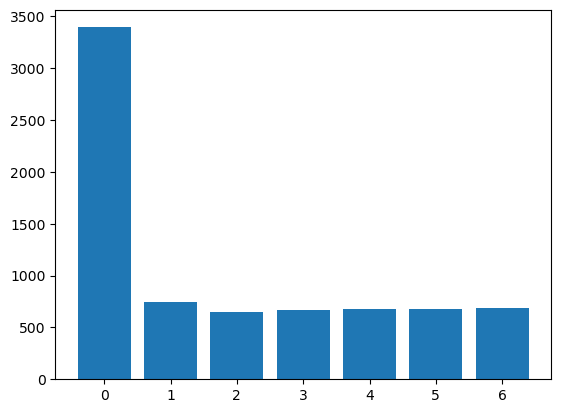

In [5]:
# 분석 및 시각화 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

# 해시태그 데이터셋 불러오기
insta = pd.read_csv('insta_tags.csv', encoding='cp949')
insta['TAGS'] = insta['TAGS'].astype('long')

# 태그수가 0인 데이터와 0 초과인 데이터 분리
df = insta[insta['TAGS']>0]
df0 = insta[insta['TAGS']==0]

# 0초과 데이터셋을 6개로 데이터 수 균등 분할함
labels = [1,2,3,4,5,6]
df2 = pd.qcut(df['TAGS'],6,labels = labels)
#분할 경계값 확인
print(df2.unique())


# 분할된 데이터셋의 개수를 확인
temp = pd.value_counts(df2)
print(temp)

# 태그가 0인 데이터의 개수 확인
print(df0.count())

# 히스토그램을 통해 균등한 분할이 이루어졌는지 확인
values = [df0['TAGS'].count(), temp[1], temp[2], temp[3], temp[4], temp[5], temp[6]]
labels = [0,1,2,3,4,5,6]
plt.bar(labels, values)
plt.show()